In [1]:
# Change your Directory accordingly
import os
os.chdir("D:/Nova/T3/Machine_Learning/Group_Asssignment/Air-Quality-Forecast")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/Nova/T3/Machine_Learning/Group_Asssignment/Air-Quality-Forecast'

In [57]:
import pandas as pd
from src.DatasetDownloader import DatasetDownloader
from src.feature_engineering import FeatureEngineering 
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.cm as cm
import numpy as np

# Table of Contents

- 1. [Data Import](#1-data-import)
- 2. [Exploartory Data Analysis](#2-exploratory-data-analysis)
  - 2.1 [Data Cleaning](#21-data-cleaning) 
  - 2.2 [Data Exploration](#22-data-exploration)
  - 2.3 [Numerical Histogram](#23-histogram)
  - 2.4 [Correlation Matrix](#24-correlation-matrix)
  - 2.5 [Time Series Analysis](#25-time-series-analysis)
  - 2.6 [Wind Analysis](#27-wind-direction-analysis)

# 1. Data Import

## Brief Summary about the Dataset:

- ``Date``: Hourly Data (e.g 2010-01-02 00:00:00), reaching from '2010-01-02 00:00:00', '2014-12-31 23:00:00'
- ``Pollution``: Level of Pollution
- ``Dew``: Temperature at which the Air becomes saturated with 100% moisture
- ``Temp``: Temperature
- ``Press``: Air pressure
- ``Wnd_dir``: Wind direction
- ``Wnd_spd``: Wind speed
- ``Snow``: CMs of Snow #Assumption
- ``Rain``: MMs of Rain #Assumption



In [42]:
dataset_slug = 'rupakroy/lstm-datasets-multivariate-univariate'
download_path = './data/lstm-datasets' 

# Now you can call the function
dataset = DatasetDownloader(dataset_slug, download_path)
dataset.download()

df_pollution, df_pollution_test = dataset.importer()


Dataset already exists. Skipping download.
Datasets imported successfully!


# 2. Exploratory Data Analysis

In [43]:
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [44]:
df_pollution['date'] = pd.to_datetime(df_pollution['date'])
df_pollution.set_index('date', inplace=True)
df_pollution.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## 2.1 Data Cleaning

In [45]:
fe1 = FeatureEngineering(df_pollution)
print("=== Checking and Cleaning Data for the Pollution Dataset === \n")
fe1.data_cleaning()

fe2 = FeatureEngineering(df_pollution_test)
print("\n=== Checking and Cleaning Data for the Pollution Test Dataset  ===\n")
fe2.data_cleaning()
print("\n === Data Cleaning Completed ===")

=== Checking and Cleaning Data for the Pollution Dataset === 

No missing values found 🚀
Duplicate rows found:                      pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-06-19 04:00:00       98.0   16  18.0  1005.0      SE     0.89     0     0
2010-09-30 07:00:00        0.0    8   9.0  1019.0      NW     0.89     0     0
2012-08-07 22:00:00       79.0   25  28.0  1006.0      cv     0.89     0     0
2012-08-24 03:00:00       81.0   17  18.0  1013.0      cv     1.78     0     0
2013-04-04 09:00:00       92.0   -5  10.0  1015.0      cv     0.89     0     0
2013-05-18 06:00:00        0.0   13  17.0  1008.0      cv     0.89     0     0
2013-08-11 02:00:00       80.0   24  27.0  1006.0      SE     3.58     0     0
2013-09-19 04:00:00      114.0   17  20.0  1014.0      SE     3.58     0     0
2013-10-10 04:00:00      203.0   11  14.0  1006.0      cv     0.89     0     0
2013-11-19 11:00:00 

## 2.2 Data Exploration

In [46]:
print("=== Checking and Cleaning Data for the Pollution Dataset === \n")
fe1.find_uniques()

print("\n=== Checking and Cleaning Data for the Pollution Test Dataset  ===\n")
fe2.find_uniques()

=== Checking and Cleaning Data for the Pollution Dataset === 

pollution: has 581 unique values 

dew: has 69 unique values 

temp: has 64 unique values 

press: has 60 unique values 

wnd_dir: has unique 4 values: ['SE' 'cv' 'NW' 'NE'] 

wnd_spd: has 2788 unique values 

snow: has 28 unique values 

rain: has 37 unique values 


=== Checking and Cleaning Data for the Pollution Test Dataset  ===

dew: has 20 unique values 

temp: has 21 unique values 

press: has 25 unique values 

wnd_dir: has unique 4 values: ['SE' 'cv' 'NE' 'NW'] 

wnd_spd: has 187 unique values 

snow: has 1 unique values 

rain: has 1 unique values 

pollution: has 178 unique values 



## 2.3 Histogram



The following histograms represent the distribution of various environmental variables, likely measured in Beijing based on the context of your previous windrose analysis. Each histogram provides insight into the frequency of occurrence of different values for the respective variables. Here's a brief interpretation:

- **Pollution**: The distribution is right-skewed, with a significant peak around 200-300 units, suggesting that lower to moderate pollution levels are most common. Higher pollution levels (above 600) occur less frequently but still contribute to a notable portion of the data.

- **Dew**: This variable shows a roughly normal distribution centered around 0° to 10°, with a high frequency of occurrences in this range. There are fewer instances of extreme dew values (below -30° or above 30°), indicating a stable dew point range.

- **Temperature (temp)**: The temperature data exhibits a bimodal distribution with peaks around -10° to 0° and 20° to 30° units, suggesting two dominant temperature regimes, possibly reflecting seasonal variations (e.g., winter and summer).

- **Pressure (press)**: The pressure histogram is centered around 1010-1020 hpa, with a bell-shaped distribution, indicating that atmospheric pressure is relatively stable with most values clustering around this range.

- **Wind Speed (wnd_spd)**: Wind speed is highly skewed, with the vast majority of values near 0, and a sharp drop-off as speed increases beyond 100 ?. This suggests predominantly calm conditions with occasional higher wind speeds.

- **Snow**: The snow data is heavily skewed, with a peak near 0cms, indicating that snow is rare or minimal for most observations, with very few instances exceeding 10cms units.

- **Rain**: Similar to snow, the rain histogram is skewed, with a dominant peak at 0, suggesting that rain is infrequent or negligible in most cases, with very few occurrences above 5 mm. Furthermore, in Times of Rain there is no Snow, and in Periods of Snow there is no Rain, therefore signaling the different season

In [48]:
cat_cols =  []
num_cols = []

for col in df_pollution.columns: 
    if df_pollution[col].dtype in ["categorical", "object"]:
        cat_cols.append(col)
    else:
        num_cols.append(col)

print(f"Cat Cols: \n {cat_cols} \n")
print(f'Numerical Cols: \n {num_cols}')


Cat Cols: 
 ['wnd_dir'] 

Numerical Cols: 
 ['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain']


C:\Users\morit\AppData\Local\Temp\ipykernel_13720\2874324600.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_pollution.hist(ax = ax)


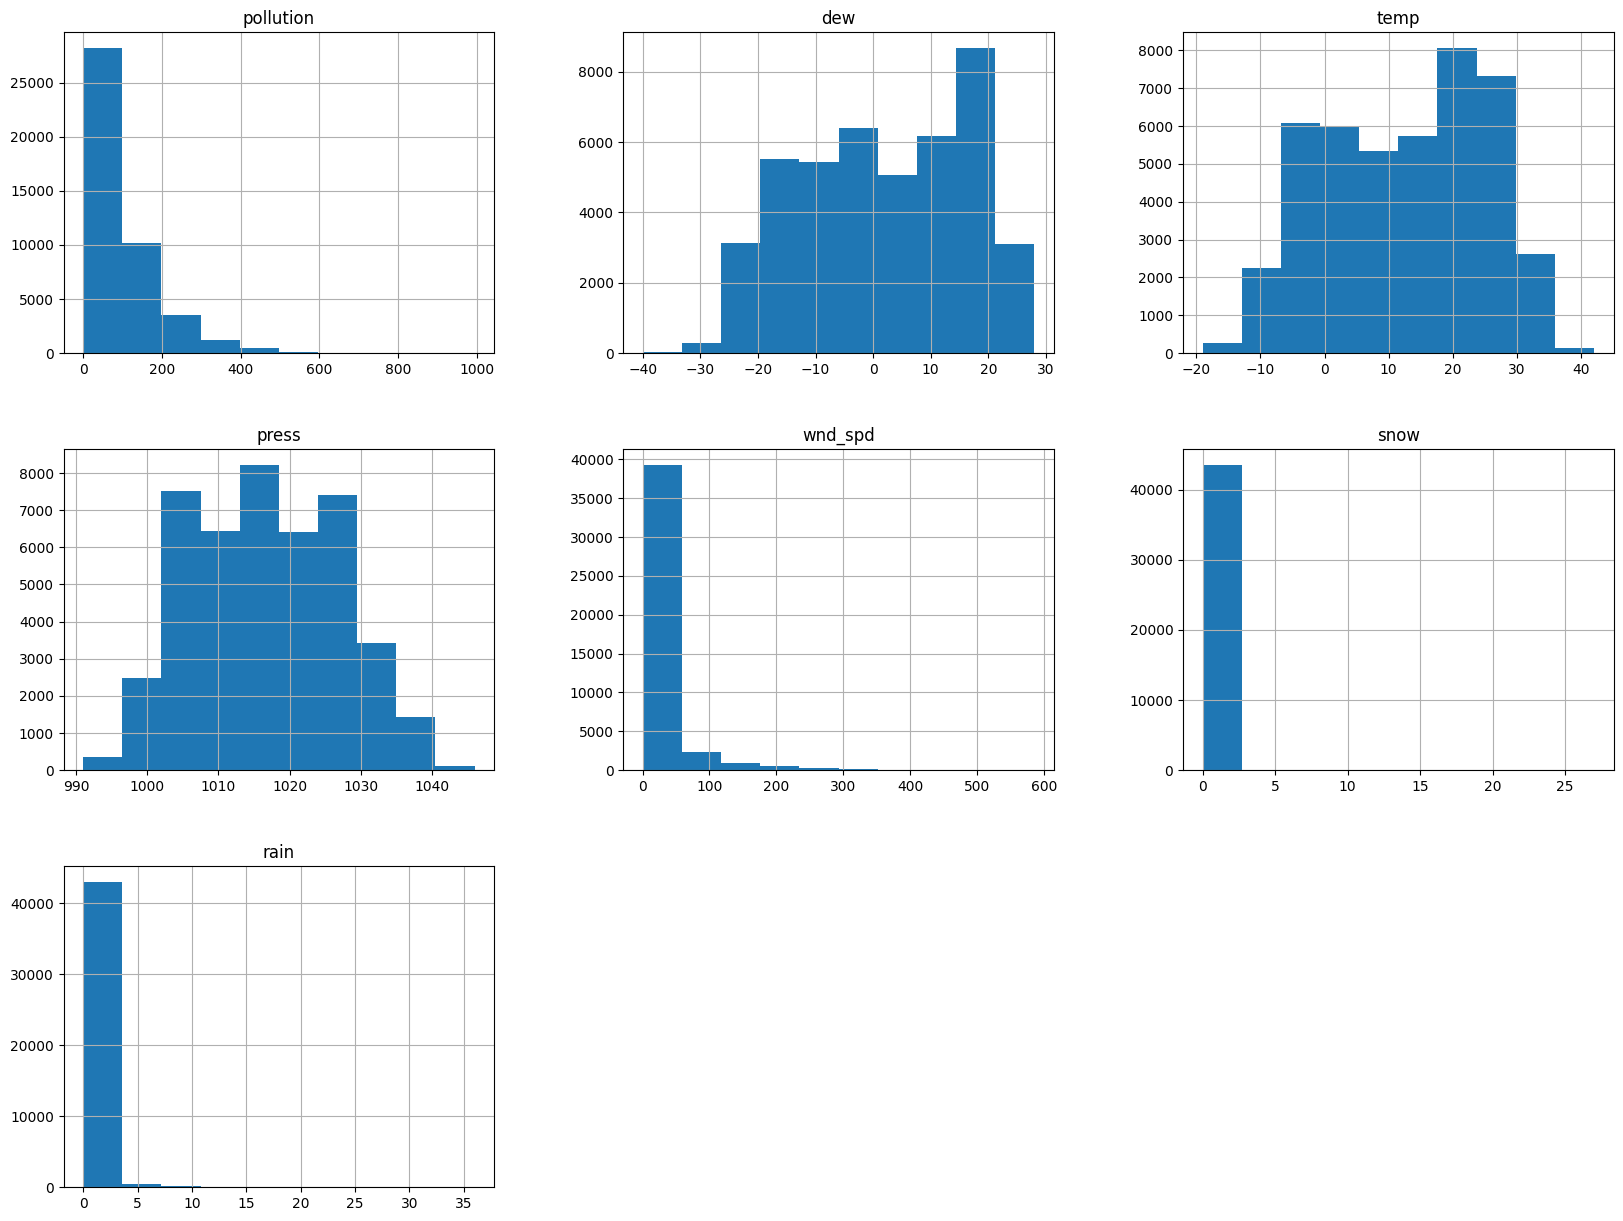

In [49]:
fig, ax = plt.subplots(figsize = (20,15))
df_pollution.hist(ax = ax)
plt.show()

# 2.4 Correlation Matrix


- **Pollution**: Shows a moderate positive correlation with `dew` (0.16) and `rain` (0.22), suggesting that higher pollution levels might be associated with increased dew and rainfall. It has a moderate negative correlation with `temp` (-0.91) and `press` (-0.46), indicating that pollution tends to be higher when temperatures and atmospheric pressure are lower.

- **Dew**: Strongly positively correlated with `temp` (0.82), meaning higher dew points are associated with higher temperatures. It has a strong negative correlation with `press` (-0.78), suggesting that lower pressure is associated with higher dew points.

- **Temperature (temp)**: As noted, it’s strongly correlated with `dew` (0.82) and negatively correlated with `press` (-0.83) and `pollution` (-0.91). This indicates that higher temperatures are associated with higher dew points, lower pressure, and lower pollution levels.

- **Pressure (press)**: Shows strong negative correlations with `dew` (-0.78), `temp` (-0.83), and moderate negative correlations with `pollution` (-0.46), `snow` (-0.69), and `rain` (-0.08). Higher pressure seems to be associated with drier, colder conditions and lower pollution.

- **Wind Speed (wnd_spd)**: Has weak correlations with most variables, with the strongest being a negative correlation with `temp` (-0.15), suggesting that higher wind speeds might occur with lower temperatures.

- **Snow**: Shows a moderate negative correlation with `press` (-0.69) and weak positive correlations with `pollution` (0.22) and `dew` (0.03), indicating that snow events might be more likely with lower pressure and slightly higher pollution.

- **Rain**: Has a weak positive correlation with `pollution` (0.22) and `dew` (0.13), and a very weak negative correlation with `press` (-0.08), suggesting that rainfall might slightly increase with higher pollution and dew but is not strongly tied to pressure.

<Axes: >

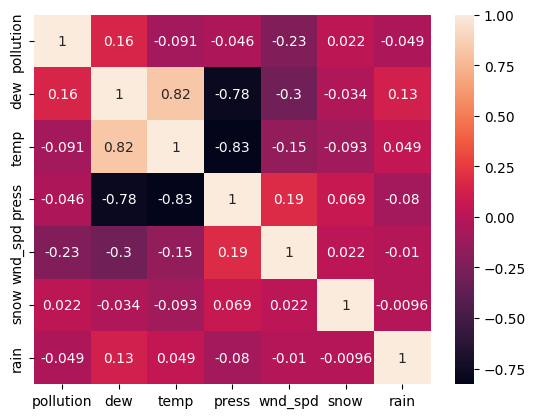

In [56]:
sns.heatmap(df_pollution[num_cols].corr(), annot = True)

## 2.5 Time Series Analysis

These time series plots show environmental variables in Beijing from 2010 to 2015:

- **Pollution**: High variability with frequent spikes above 800, especially in winters (e.g., early 2010, 2012, 2013), indicating seasonal pollution peaks.
- **Dew**: Clear seasonal pattern, peaking at 20°-30° in summers and dropping to -30° in winters, reflecting temperature-driven humidity changes.
- **Temperature (temp)**: Strong seasonal cycle, ranging from -10°C in winters to 30°C in summers, with consistent yearly patterns.
- **Pressure (press)**: Seasonal fluctuations between 990 and 1040 hpa, with higher pressure in winters and lower in summers, inversely related to temperature.
- **Wind Speed (wnd_spd)**: Mostly low, with occasional spikes up to 600 (?), showing no clear seasonal trend but frequent short bursts.
- **Snow**: Rare, with small peaks in winters (e.g., 2010, 2012, 2013), reaching up to 25 cms, consistent with cold seasons.
- **Rain**: Sporadic, with peaks in summers (e.g., 2010, 2012, 2014), reaching up to 35 mms, reflecting monsoon patterns.

### Summary
Seasonal patterns dominate temperature, dew, and pressure, while pollution peaks in winter. Wind speed, snow, and rain are more erratic, with snow and rain tied to specific seasons.

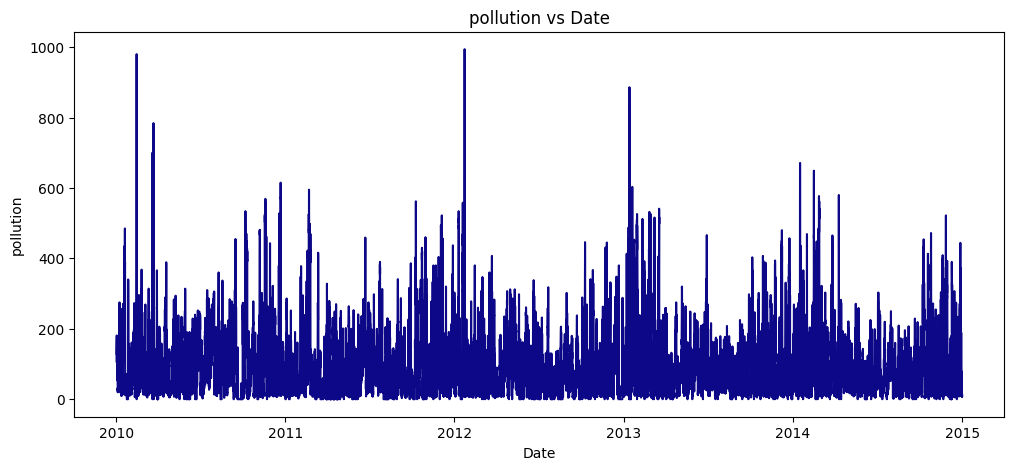

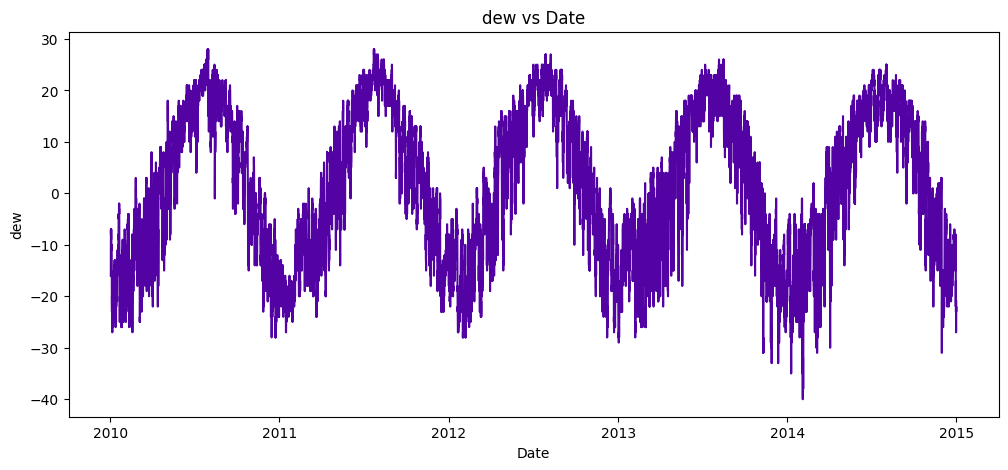

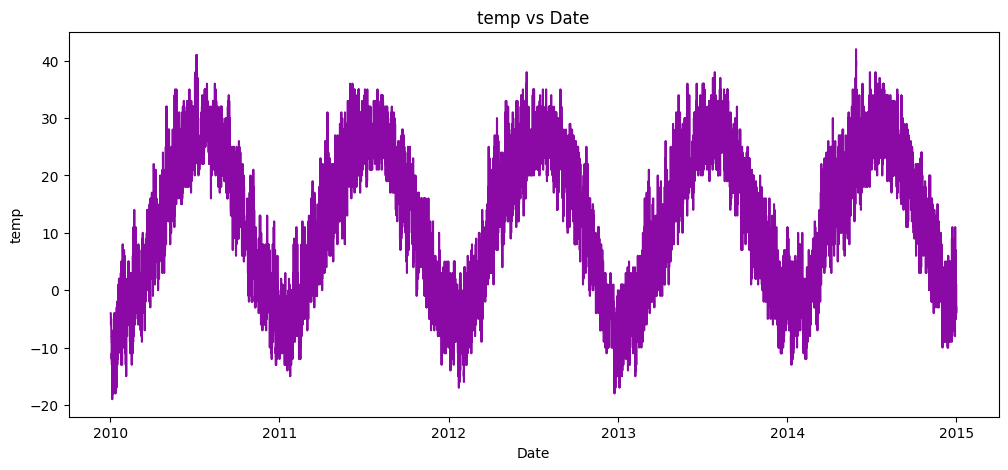

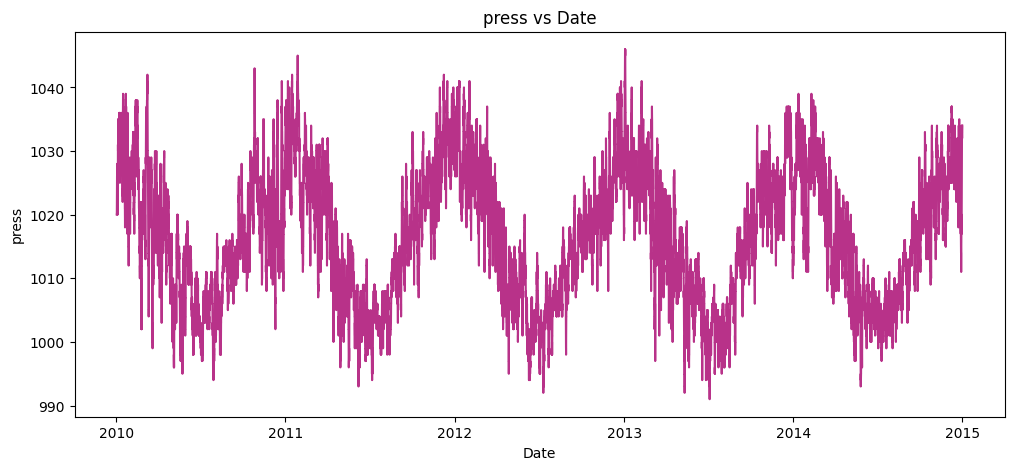

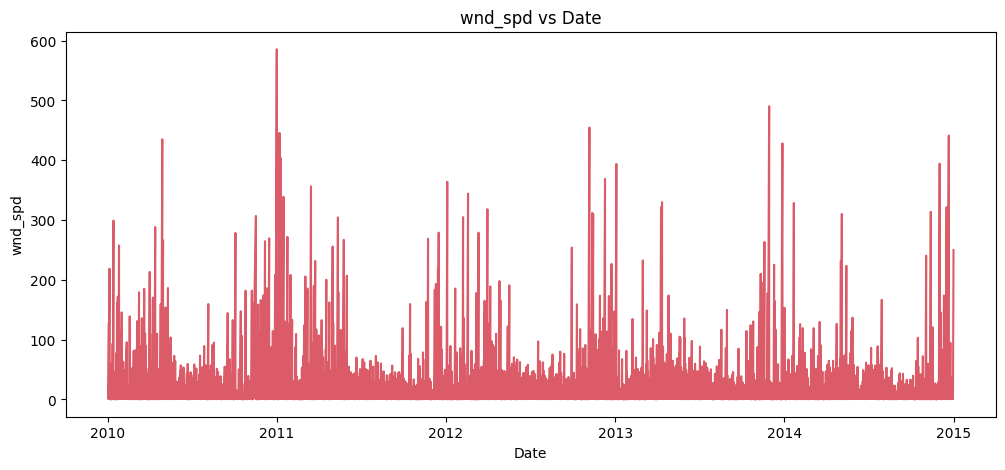

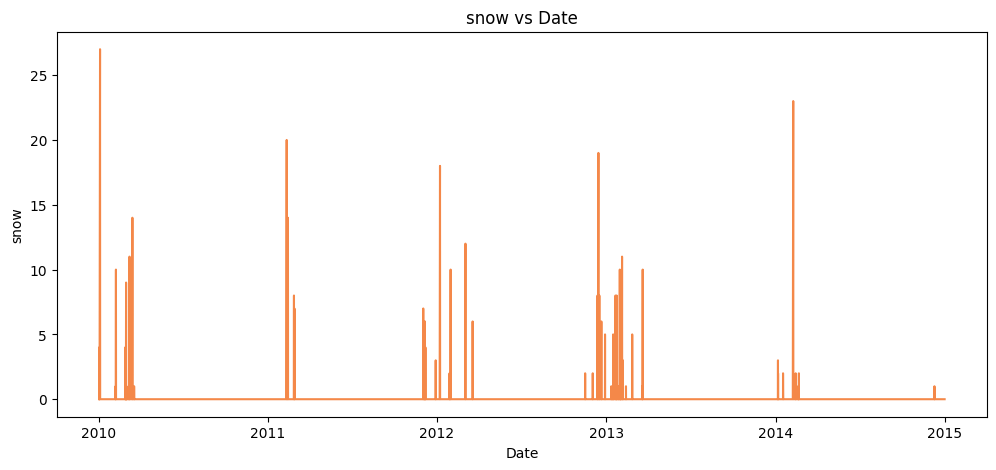

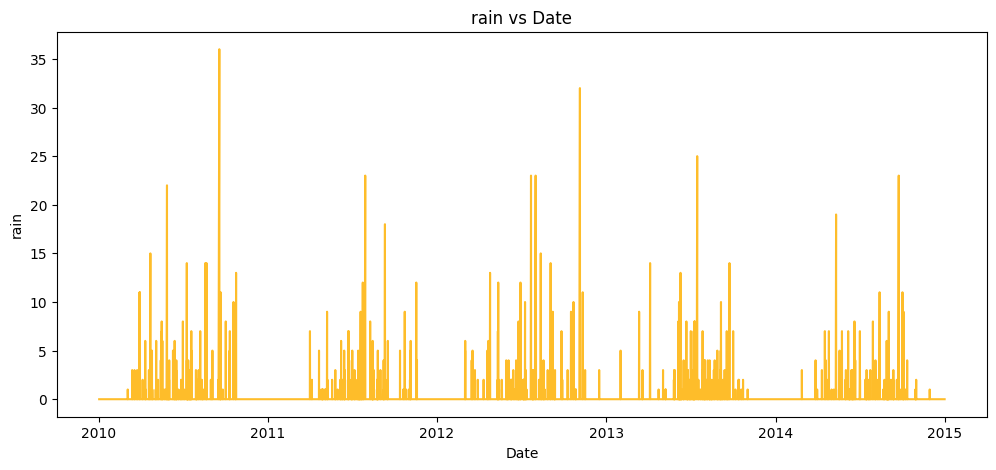

In [ ]:
df_num = df_pollution[num_cols]
for i, col in enumerate(num_cols):
    plt.figure(figsize=(12, 5))
    color = cm.plasma(i / len(num_cols))
    plt.plot(df_pollution.index, df_num[col], color=color)
    plt.title(f"{col} vs Date")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()


## 2.6 Pollution Outlier Detection

- **General Trend**: Pollution levels fluctuate between 100 and 500 units, with periodic spikes indicating seasonal or episodic pollution events.
- **Outliers**: Red markers highlight extreme pollution levels exceeding 400-500 units, occurring sporadically across all years (e.g., early 2010, 2011, 2013, 2014). These likely represent significant pollution episodes, possibly linked to industrial activity, weather conditions, or seasonal factors.
- **Seasonal Patterns**: Higher peaks are noticeable in winters (e.g., 2010, 2012, 2013), consistent with the earlier correlation of pollution with lower temperatures and pressure.

### Summary
The plot reveals a baseline pollution level with occasional outliers above 400 units, predominantly in winter months. These outliers suggest periods of heightened pollution, which could be further analyzed alongside wind direction data from your windrose plot to identify potential sources or dispersion patterns.

In [11]:
from scipy.stats import zscore #ind of uneccesary but looks cool

df_daily = df_pollution
df_daily.set_index('date', inplace = True)
df_daily = df_daily.resample("D").mean(numeric_only=True)
df_daily['pollution_zscore'] = zscore(df_daily["pollution"])
outliers_day = df_daily[df_daily['pollution_zscore'].abs() > 3]


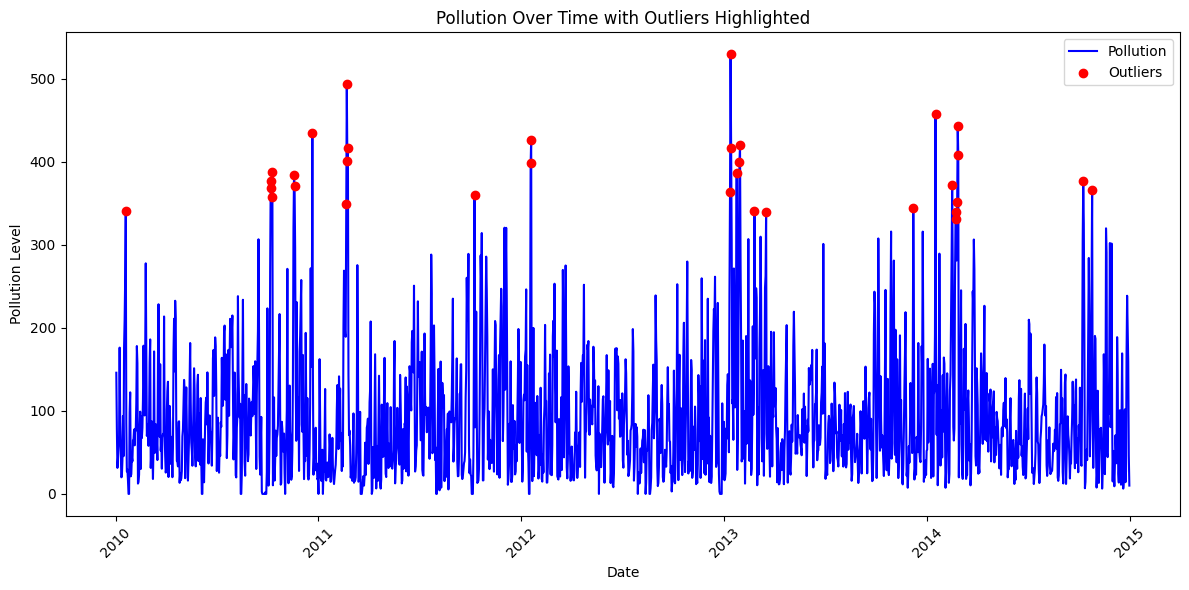

In [ ]:

outliers_day.sort_values("pollution_zscore", ascending=False)
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['pollution'], label='Pollution', color='blue')
plt.scatter(outliers_day.index, outliers_day['pollution'], color='red', label='Outliers', zorder=5)
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Pollution Over Time with Outliers Highlighted')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.7 Wind Direction Analysis

These bar plots summarize the total sums of pollution, snow, and rain grouped by wind direction (NE, NW, SE, cv) in Beijing, based on your dataset:

- **Pollution by Wind Direction**: Highest pollution sums are observed with SE (around 1.4 million) and NW (around 1.0 million), indicating these directions may carry more polluted air masses. NE shows a lower sum (around 0.4 million), while cv is moderate (around 1.2 million).

- **Snow by Wind Direction**: SE has the highest snow sum (around 1200 units), followed by NW (around 400 units). NE and cv show lower sums (around 200 units), suggesting SE winds are more associated with snow events.

- **Rain by Wind Direction**: NW has the highest rain sum (around 2500 units), with SE and cv at similar levels (around 1500 units). NE shows the lowest sum (around 1500 units), indicating NW winds may bring more rainfall.

### Summary
SE winds correlate with the highest pollution and snow levels, while NW winds are linked to the most rain. These patterns align with your windrose data, where SE and NW were dominant directions, potentially influencing pollution and precipitation distribution in Beijing.

In [14]:
df_pollution["wnd_dir"].value_counts() #CV - Calm Variable Winds, which are non consisten Wind directions

wnd_dir
SE    15290
NW    14130
cv     9384
NE     4996
Name: count, dtype: int64

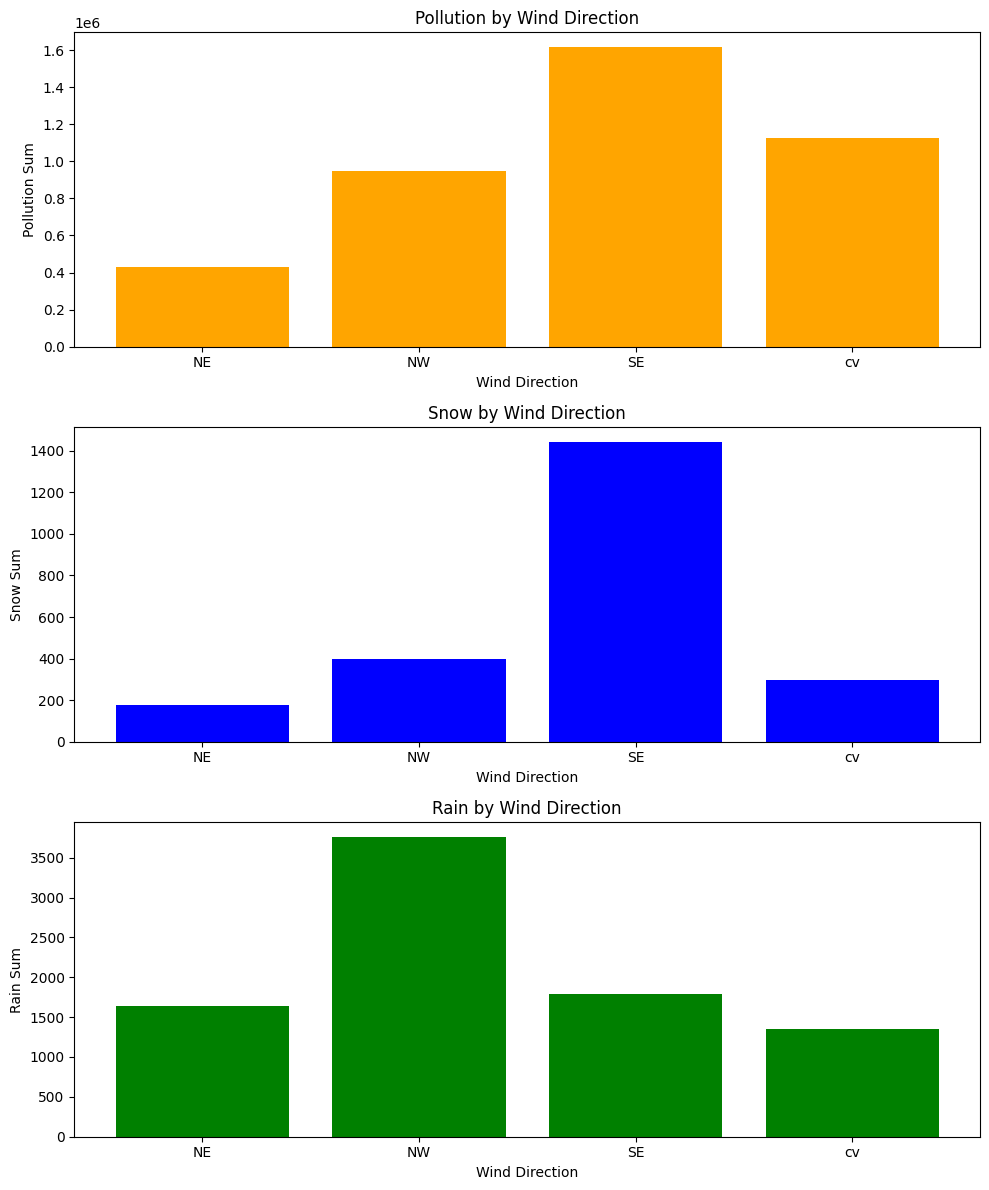

In [58]:
wind_grouped = df_pollution.groupby("wnd_dir").agg({
    "pollution": "sum",
    "snow": "sum",
    "rain": "sum"
})


x = np.arange(len(wind_grouped))  
columns_to_plot = ['pollution', 'snow', 'rain']
titles = ['Pollution by Wind Direction', 'Snow by Wind Direction', 'Rain by Wind Direction']
colors = ['orange', 'blue', 'green']


fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, col in enumerate(columns_to_plot):
    axs[i].bar(x, wind_grouped[col], color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Wind Direction')
    axs[i].set_ylabel(f'{col.capitalize()} Sum')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(wind_grouped.index)


plt.tight_layout()
plt.show()


C:\Users\morit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\windrose\windrose.py:667: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


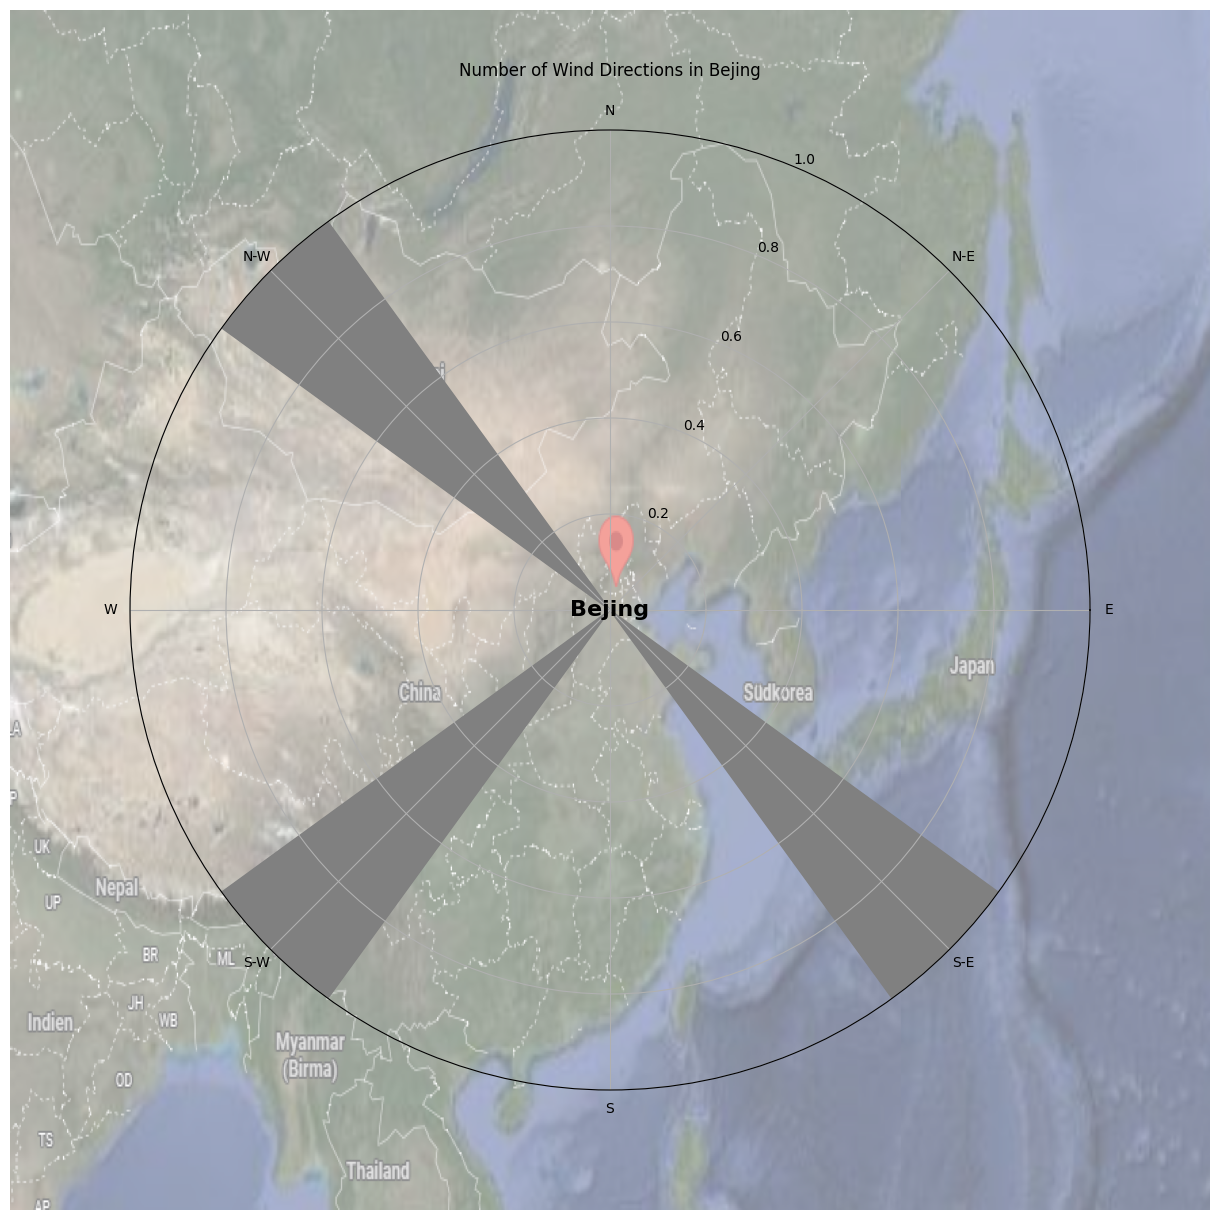

In [ ]:
# Load the satellite image (ensure the path is correct)
img = mpimg.imread(r'notebooks\satelite_image.png')

# Wind direction mapping
direction_mapping = {
    'SE': 135, 'NW': 315, 'cv': None, 'NE': 45  # 'cv' is treated as invalid
}

# Your wind directions and their respective counts
wind_directions = ['SE', 'NW', 'cv', 'NE']
counts = [15290, 14130, 9384, 4996]

# Create dataframe
df_wind = pd.DataFrame({'wind_direction': wind_directions, 'counts': counts})
df_wind['wind_direction_deg'] = df_wind['wind_direction'].map(direction_mapping)

# Drop rows where 'cv' was (invalid direction)
df_wind = df_wind.dropna(subset=['wind_direction_deg'])


# Create the figure
fig = plt.figure(figsize=(12, 12))

# Create background axes for the satellite image
ax_bg = fig.add_axes([0, 0, 1, 1])
ax_bg.imshow(img, extent=[-np.pi, np.pi, -np.pi, np.pi], alpha=0.5, aspect='auto')
ax_bg.axis('off')  # Hide background axes

# Create windrose axes on top with transparent background
ax_wind = WindroseAxes(fig, [0.1, 0.1, 0.8, 0.8], facecolor='none')
fig.add_axes(ax_wind)

# Plot the windrose bars with the normalized counts
ax_wind.bar(np.array(df_wind['wind_direction_deg']), np.array(df_wind['counts']), edgecolor='white', color='gray', opening=0.8, blowto = True)

# Customize the plot
ax_wind.set_title("Number of Wind Directions in Bejing", pad=20)
ax_wind.text(0, 0, 'Bejing', color='black', ha='center', va='center',
             fontsize=16, fontweight='bold')

# Display the plot
plt.show()


test